In [ ]:
#zwykła konwolucyjna sieć - obrazek czas x czestosc, kanały RGB - elektrody - przetestować
#CONV2D, minpooling potem, dense (f-cja aktywacji softmax) - wyjscie to p-stwo wyjscia z klas
#punkt początkowy j.w.
#filtr dla sieci - dłuższy w czasie (np. 7,11), najwyżej dociać
#zbiory uczące - potem będziemy składać sieci
#zbiory - 2 sposoby jak je budować (od Mateusza)
#widmo - spr do jakiej częstości obciąć (z tego co wychodzi z abs hilberta), 6 razy mniej (?)
#kilka próbek od kilku pacjentów

#wyćwiczone na wszystkich - wyzerować któreś i tak sprawdzić (pasmo częstowściowe)


In [ ]:
''' 25 na 5 foldów - 5x5 średnie acc, auc
    8 walidacyjnych zostaje
    5 różnych modeli - dla każddego z osobna walidacja
    jesli więcej niż 3 modele na daną klase - zaklasyfikowany - policzyć accuracy,
    wykresy acc w czasie i loss w czasie dla każdej z 5 (25 na 5 foldów) modeli (w każdej iteracji),
    sprawadź dla paru batch size jak sie zachowują wykresy,
    '''

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Loading data

In [34]:
class_no8 = np.load('class_no8.npy')
data_no8 = np.load('data_no8.npy')


class_no13 = np.load('class_no13.npy')
data_no13 = np.load('data_no13.npy')

class_no18 = np.load('class_no18.npy')
data_no18 = np.load('data_no18.npy')

class_no23 = np.load('class_no23.npy')
data_no23 = np.load('data_no23.npy')

class_no28 = np.load('class_no28.npy')
data_no28 = np.load('data_no28.npy')

class_no33 = np.load('class_no33.npy')
data_no33 = np.load('data_no33.npy')

### Validation dataset

In [35]:
X_validation = np.einsum('ijkl->jlik',data_no8)
y_validation = to_categorical(class_no8).astype(int)
print(X_validation.shape)
y_validation.shape

(7285, 77, 5, 19)


(7285, 2)

### Training dataset

In [36]:
X_train = np.concatenate((data_no13,data_no18,data_no23,data_no28), axis = 1)
X_train = np.einsum('ijkl->jlik', X_train)
y_train = np.concatenate((class_no13,class_no18,class_no23,class_no28))
y_train = to_categorical(y_train).astype(int)
print(X_train.shape)
y_train.shape

(18090, 77, 5, 19)


(18090, 2)

### Test dataset

In [37]:
X_test = np.einsum('ijkl->jlik',data_no33)
y_test = to_categorical(class_no33).astype(int)
print(X_test.shape)
y_test.shape

(4672, 77, 5, 19)


(4672, 2)

In [102]:
batch_size = 200
no_epochs = 30
learning_rate = 0.001
no_classes = 2
validation_spl = 0.3
verbosity = 1
sample_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])


In [105]:
model = Sequential()
model.add(Conv2D(60, kernel_size = (7,1),input_shape=sample_shape, activation='relu', data_format = 'channels_last'))
model.add(AveragePooling2D((7,1)))
model.add(Dense(64, activation='softmax'))
model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dense(no_classes, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train on 18090 samples, validate on 4672 samples
Epoch 1/30
18090/18090 [==============================] - 3s 157us/sample - loss: 0.7839 - acc: 0.5017 - val_loss: 0.6934 - val_acc: 0.5032
Epoch 2/30
18090/18090 [==============================] - 2s 122us/sample - loss: 0.6939 - acc: 0.5019 - val_loss: 0.6928 - val_acc: 0.5137
Epoch 3/30
18090/18090 [==============================] - 2s 123us/sample - loss: 0.6931 - acc: 0.5096 - val_loss: 0.6921 - val_acc: 0.5156
Epoch 4/30
18090/18090 [==============================] - 2s 124us/sample - loss: 0.6923 - acc: 0.5153 - val_loss: 0.6913 - val_acc: 0.5224
Epoch 5/30
18090/18090 [==============================] - 2s 125us/sample - loss: 0.6912 - acc: 0.5235 - val_loss: 0.6904 - val_acc: 0.5260
Epoch 6/30
18090/18090 [==============================] - 2s 124us/sample - loss: 0.6894 - acc: 0.5335 - val_loss: 0.6892 - val_acc: 0.5355
Epoch 7/30
18090/18090 [==============================] - 2s 123us/sample - loss: 0.6883 - acc: 0.5430 - val_lo

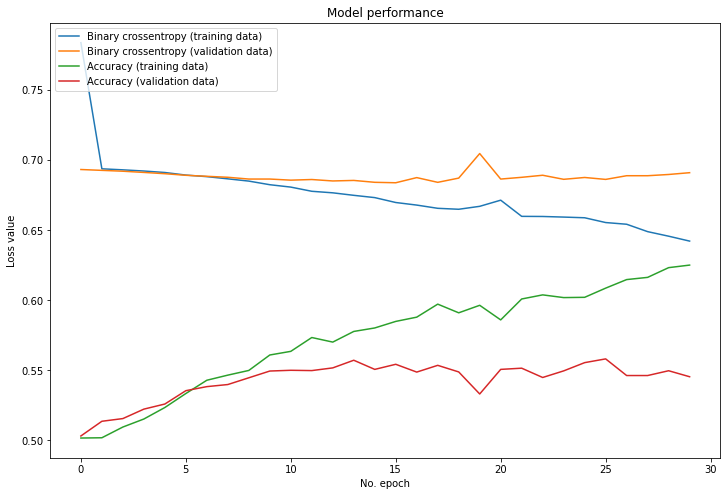

In [106]:
# Fit data to model
history = model.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_data=(X_test, y_test))

# Generate generalization metrics
score = model.evaluate(X_validation, y_validation, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Plot history: Categorical crossentropy & Accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='Binary crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Binary crossentropy (validation data)')
plt.plot(history.history['acc'], label='Accuracy (training data)')
plt.plot(history.history['val_acc'], label='Accuracy (validation data)')
plt.title('Model performance')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()